# Data analysis for the upcoming test beam (May 2023)


In [1]:
import seaborn as sns
import plotly as plot
import pydose3d
import pandas as pd
import matplotlib.pyplot as plt
import pydose3d.data as data
from pydose3d.svc.ntuple_data import NTupleDataSvc
from pydose3d.svc.dose3d import Dose3DSvc
NTupleDataSvc.ImplicitMT = True
pydose3d.set_log_level("DEBUG")

Welcome to JupyROOT 6.28/00


## Purpose: Find the barier of the PPMA to be placed before the detector
### We want to shift along the Z-profile to be after the maximum dose point 

Assumpptions: 
* Different density of the PMMA are simulated as the percentage of the original PMMA density:
100%, 75%, 50%
* The barier element (aka bolus) is defined as a box (35 mm x 35 mm x 150 mm) of given material, being placed along side the beam axis (z-axis) at the isocentre. 

In [5]:

data = f"/home/g4rt/test/g4rt/output/CellSizeComp/8mm_cells_1/8mm_cells.root"
# detector104x104 = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/DetectorSizeValidation/10.4x10.4x2_detector.root"
# detector52x8 = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/2023-05-23/single_file_tompl_run_test_2.root"
# detectorD3D = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/2023-05-23/single_file_tompl_run_test_3.root"


In [18]:
# from pydose3d.svc.ntuple_data import NTupleDataSvc
# NTupleDataSvc.ImplicitMT = True
# d3dsvc = Dose3DSvc()
# d3dsvc.set_data(data,"Dose3DVoxelisedTTree") #This is only tree name (ROOT TTree) in the patient definition used.
# df = d3dsvc.get_cell_dose_z_profile_pdframe( MLayer = 0, MColumn = 0, normalized=True)
# print(df)
# df = df[["CellPositionZ","Dose"]]
# df['scoring'] = 'Cell'

In [6]:
from pydose3d.svc.ntuple_data import NTupleDataSvc
NTupleDataSvc.ImplicitMT = True
d3dsvc = Dose3DSvc()
d3dsvc.set_data(data,"Dose3DVoxelisedTTree") #This is only tree name (ROOT TTree) in the patient definition used.
df2 = d3dsvc.get_voxel_dose_z_profile_pdframe(MLayer = 0, MColumn = 0, CLayer=2, CColumn=1, normalized=True,sum_voxel=True)
print(df2)
df2 = df2[["VoxelPositionZ","Dose"]]
df2['scoring'] = 'Voxel'

2023-09-25 16:10:46.704 | DEBUG    | pydose3d.svc.ntuple_data:__init__:30 - Initialization of high-level ROOT NTuple data reading, management and manipulation service.
2023-09-25 16:10:46.706 | DEBUG    | pydose3d.svc.ntuple_data:__init__:35 - ROOT's implicit multithreading is enabled.
2023-09-25 16:10:46.708 | DEBUG    | pydose3d.svc.ntuple_data:get_pdframe:62 - Reading /home/g4rt/test/g4rt/output/CellSizeComp/8mm_cells_1/8mm_cells.root:Dose3DVoxelisedTTree
2023-09-25 16:10:46.709 | DEBUG    | pydose3d.svc.ntuple_data:get_pdframe:64 - Reading query: VoxelDose>0.
2023-09-25 16:10:46.713 | DEBUG    | pydose3d.svc.ntuple_data:get_pdframe:71 - Reading Data from ROOT File - Done
2023-09-25 16:10:46.962 | DEBUG    | pydose3d.svc.ntuple_data:get_pdframe:83 - Number of events 2659416


       CellIdX  CellIdY  CellIdZ  VoxelIdX  VoxelIdY  VoxelIdZ   
0            0        0        0         0         0         0  \
1            0        0        0         0         0         1   
2            0        0        0         0         0         2   
3            0        0        0         0         0         3   
4            0        0        0         0         0         4   
...        ...      ...      ...       ...       ...       ...   
14966        1        1       29         4         4         0   
14967        1        1       29         4         4         1   
14968        1        1       29         4         4         2   
14969        1        1       29         4         4         3   
14970        1        1       29         4         4         4   

       VoxelPositionX  VoxelPositionY  VoxelPositionZ          Dose  
0              -10.36          -10.36            2.04  8.592181e-07  
1              -10.36          -10.36            4.12  1.188024e-06

In [20]:
# # df = df.rename(columns={"CellPositionZ":"Z [mm]"})


# pdd = pd.concat([df, df2], ignore_index=True) 

<Axes: xlabel='Z [mm]', ylabel='Dose'>

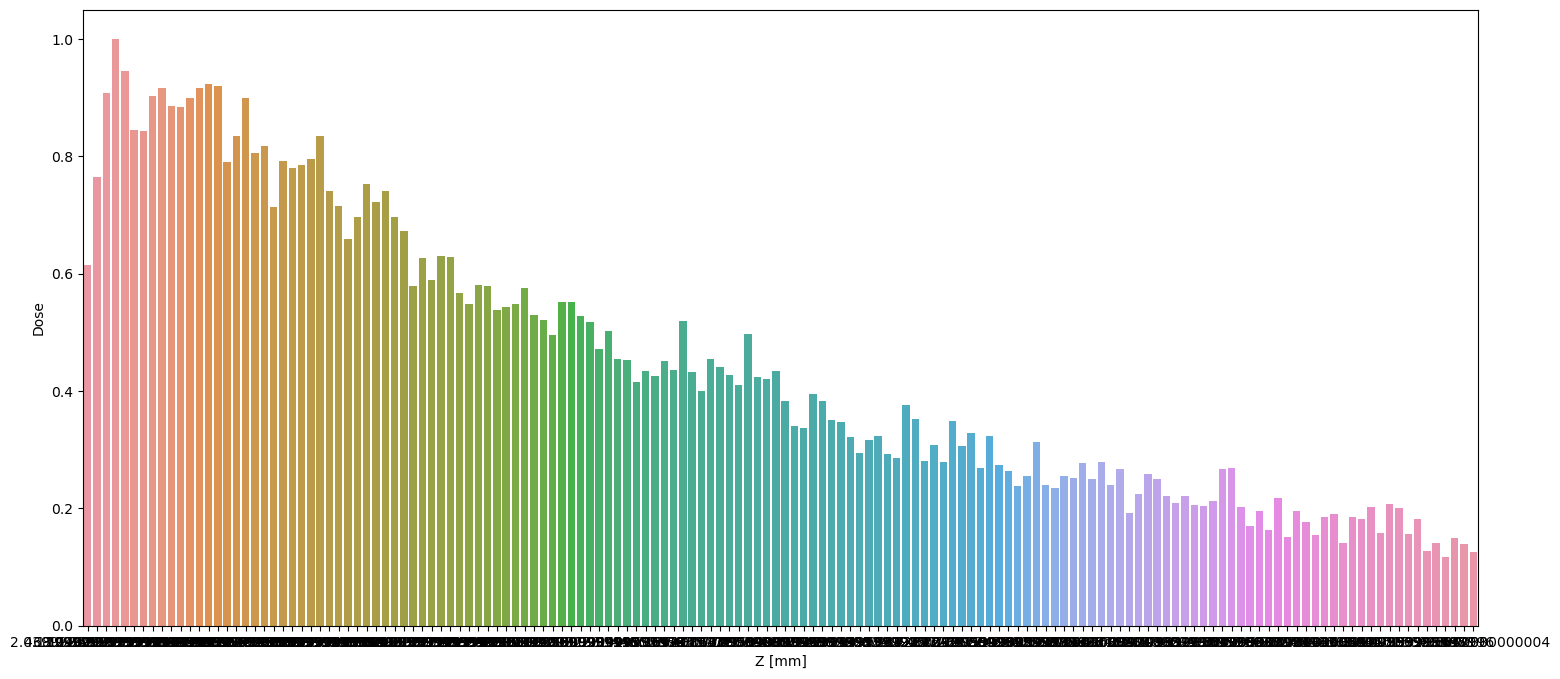

In [7]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
df2 = df2.rename(columns={"VoxelPositionZ":"Z [mm]"})
sns.barplot(data=df2,x='Z [mm]',y='Dose')